In [1]:
from google.colab import drive
import pandas as pd
import os
from io import StringIO
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

# Monter Google Drive
drive.mount('/content/drive', force_remount= True) #force_remount = True permet d'avoir un fichier mis à jour si modifs sur google drive

file_path = '/content/drive/My Drive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv'
df_total_final=pd.read_csv("/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv")
df_temp = df_total_final.copy()
df_temp['date']= pd.to_datetime(df_temp['jour'].astype('str')+'/'+df_temp['mois'].astype('str')+'/'+df_temp['an'].astype('str')+ '/'+df_temp['hrmn'].astype('str'), dayfirst = True)
df_temp['an_mois_jour'] = df_temp['date'].dt.strftime('%Y-%m-%d')

df_temp = df_temp[['an_mois_jour', 'blessé_léger', 'blessé_hospitalisé', 'tué']]

print(df_temp.head())
# On enregistre le df_total_final dans le drive partagé
df_temp.to_csv('/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_temp.csv', index=False)





Mounted at /content/drive


<ipython-input-1-6b27046daa50>:13: DtypeWarning: Columns (12) have mixed types. Specify dtype option on import or set low_memory=False.
  df_total_final=pd.read_csv("/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_total_final.csv")


  an_mois_jour  blessé_léger  blessé_hospitalisé  tué
0   2019-11-30             2                   0    0
1   2019-11-30             1                   0    0
2   2019-11-28             2                   0    0
3   2019-11-30             1                   0    0
4   2019-11-30             1                   0    0


In [2]:
df_temp = pd.read_csv('/content/drive/MyDrive/Datascientest/Projet_accidents/Dataset/2019_2023/df_temp.csv', index_col = 'an_mois_jour', parse_dates=True)
df_temp_resampled = df_temp.resample('D').sum().resample('M').sum()
df_temp_resampled.index
df_temp_resampled.head()

<ipython-input-2-bfc2d9c7b8a8>:2: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  df_temp_resampled = df_temp.resample('D').sum().resample('M').sum()


,blessé_léger,blessé_hospitalisé,tué
an_mois_jour,,,
2019-01-31,3874,1388,259
2019-02-28,3741,1508,267
2019-03-31,4262,1613,278
2019-04-30,4196,1578,258
2019-05-31,4369,1746,262


Evolution temporelle du nombre de blessés légers

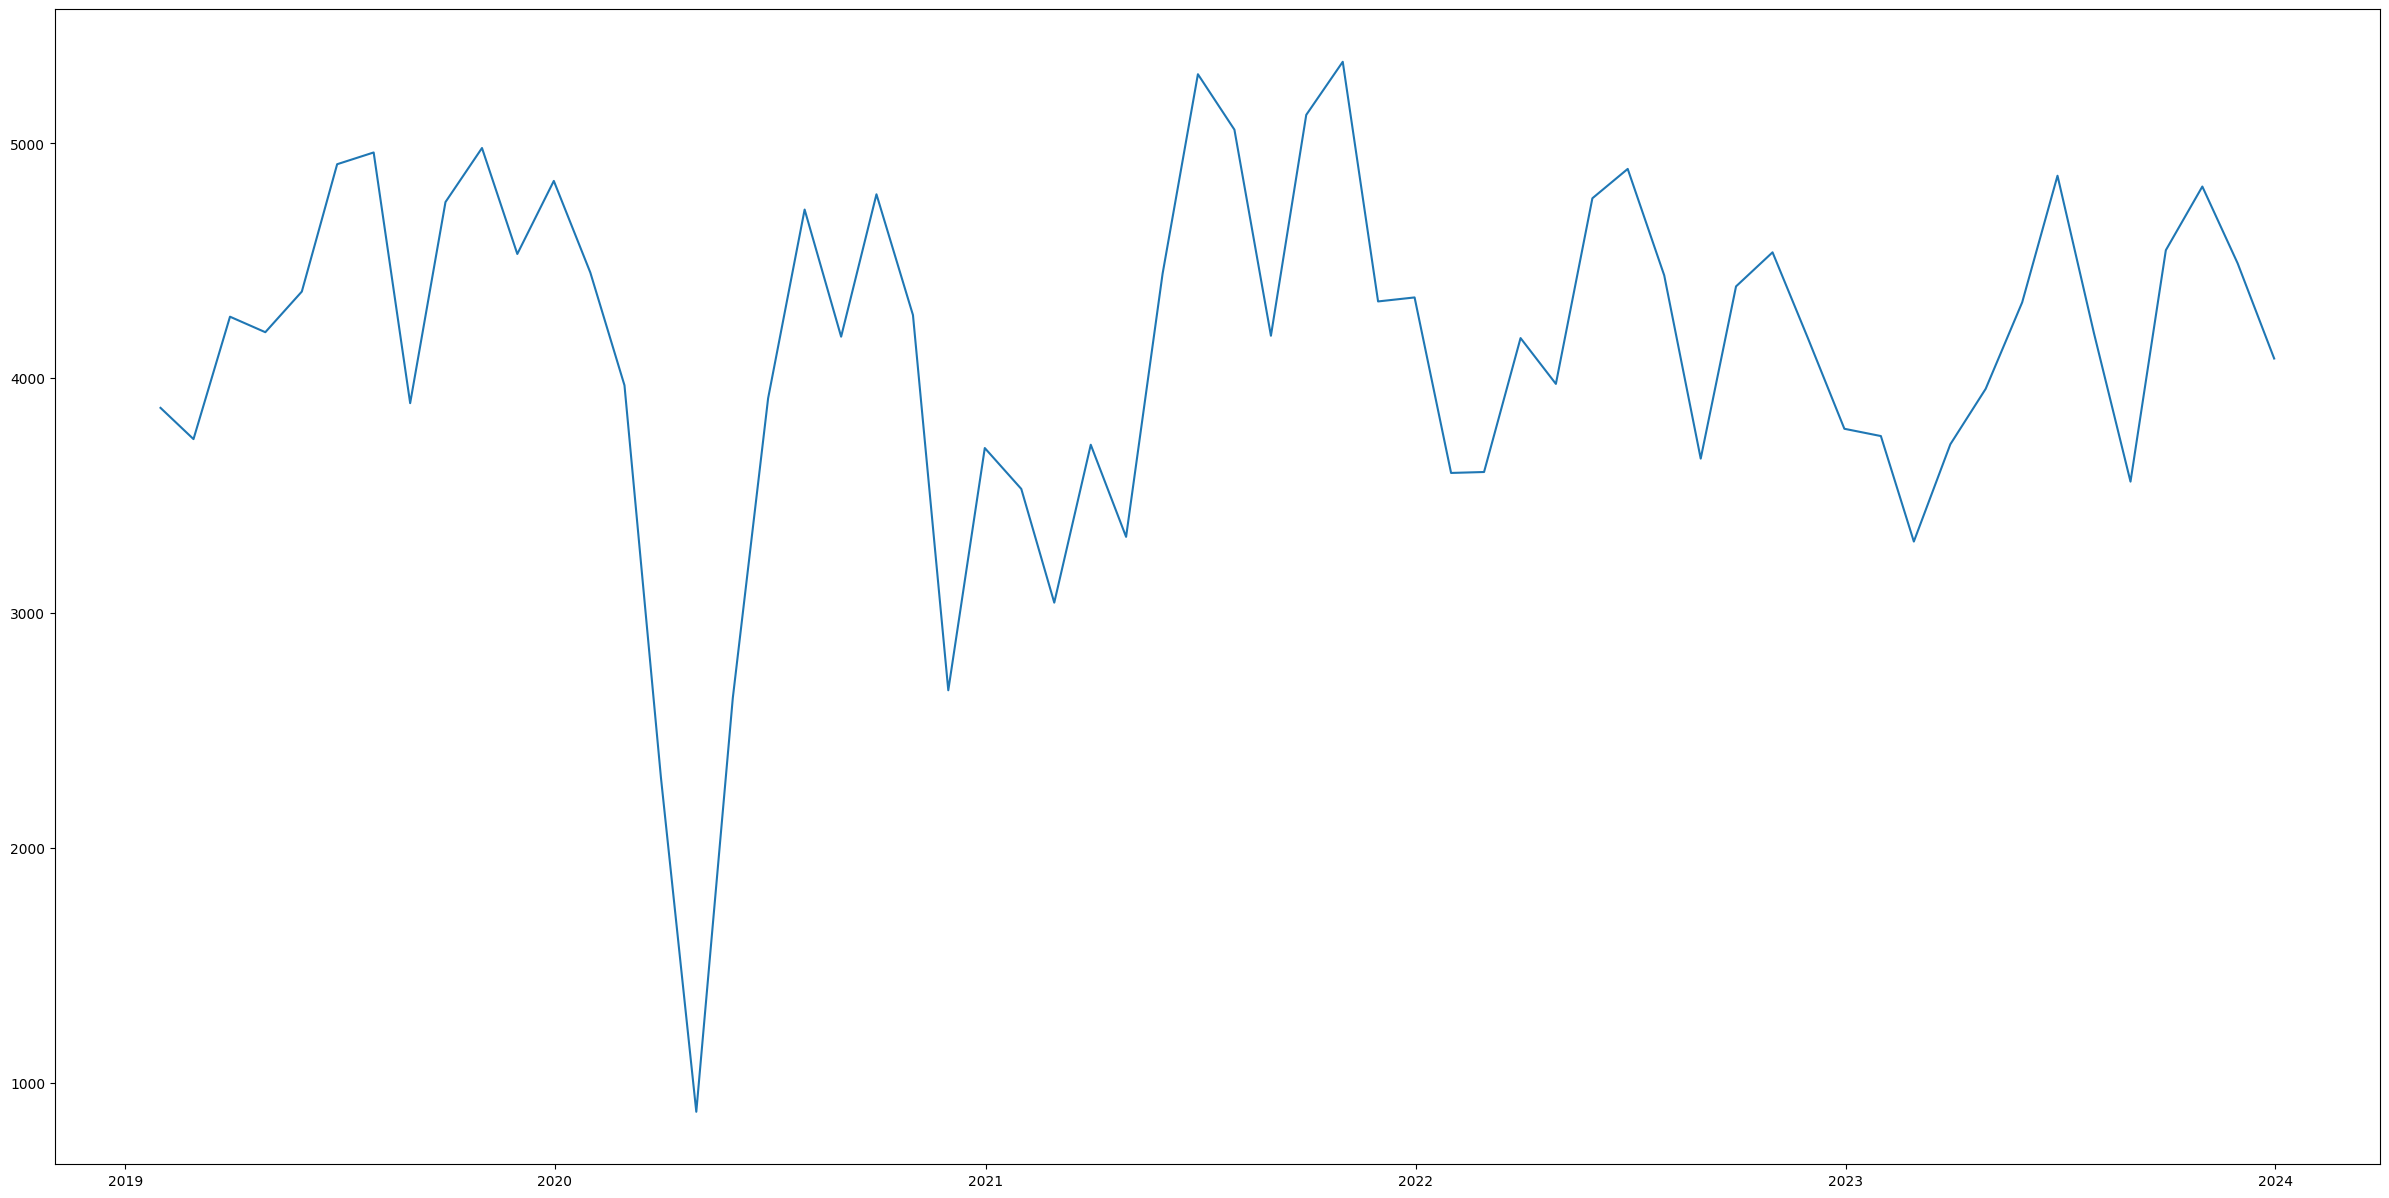

In [3]:
plt.figure(figsize = (30,15))
plt.plot('blessé_léger',data=df_temp_resampled)
plt.show()

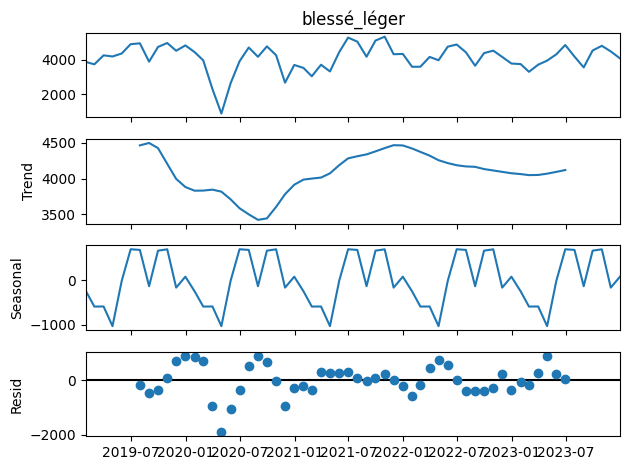

In [4]:
from statsmodels.tsa.seasonal import seasonal_decompose

variable_hospitalisé= seasonal_decompose(df_temp_resampled['blessé_léger'])
variable_hospitalisé.plot()
plt.show();

Evolution temporelle du nombre de tués

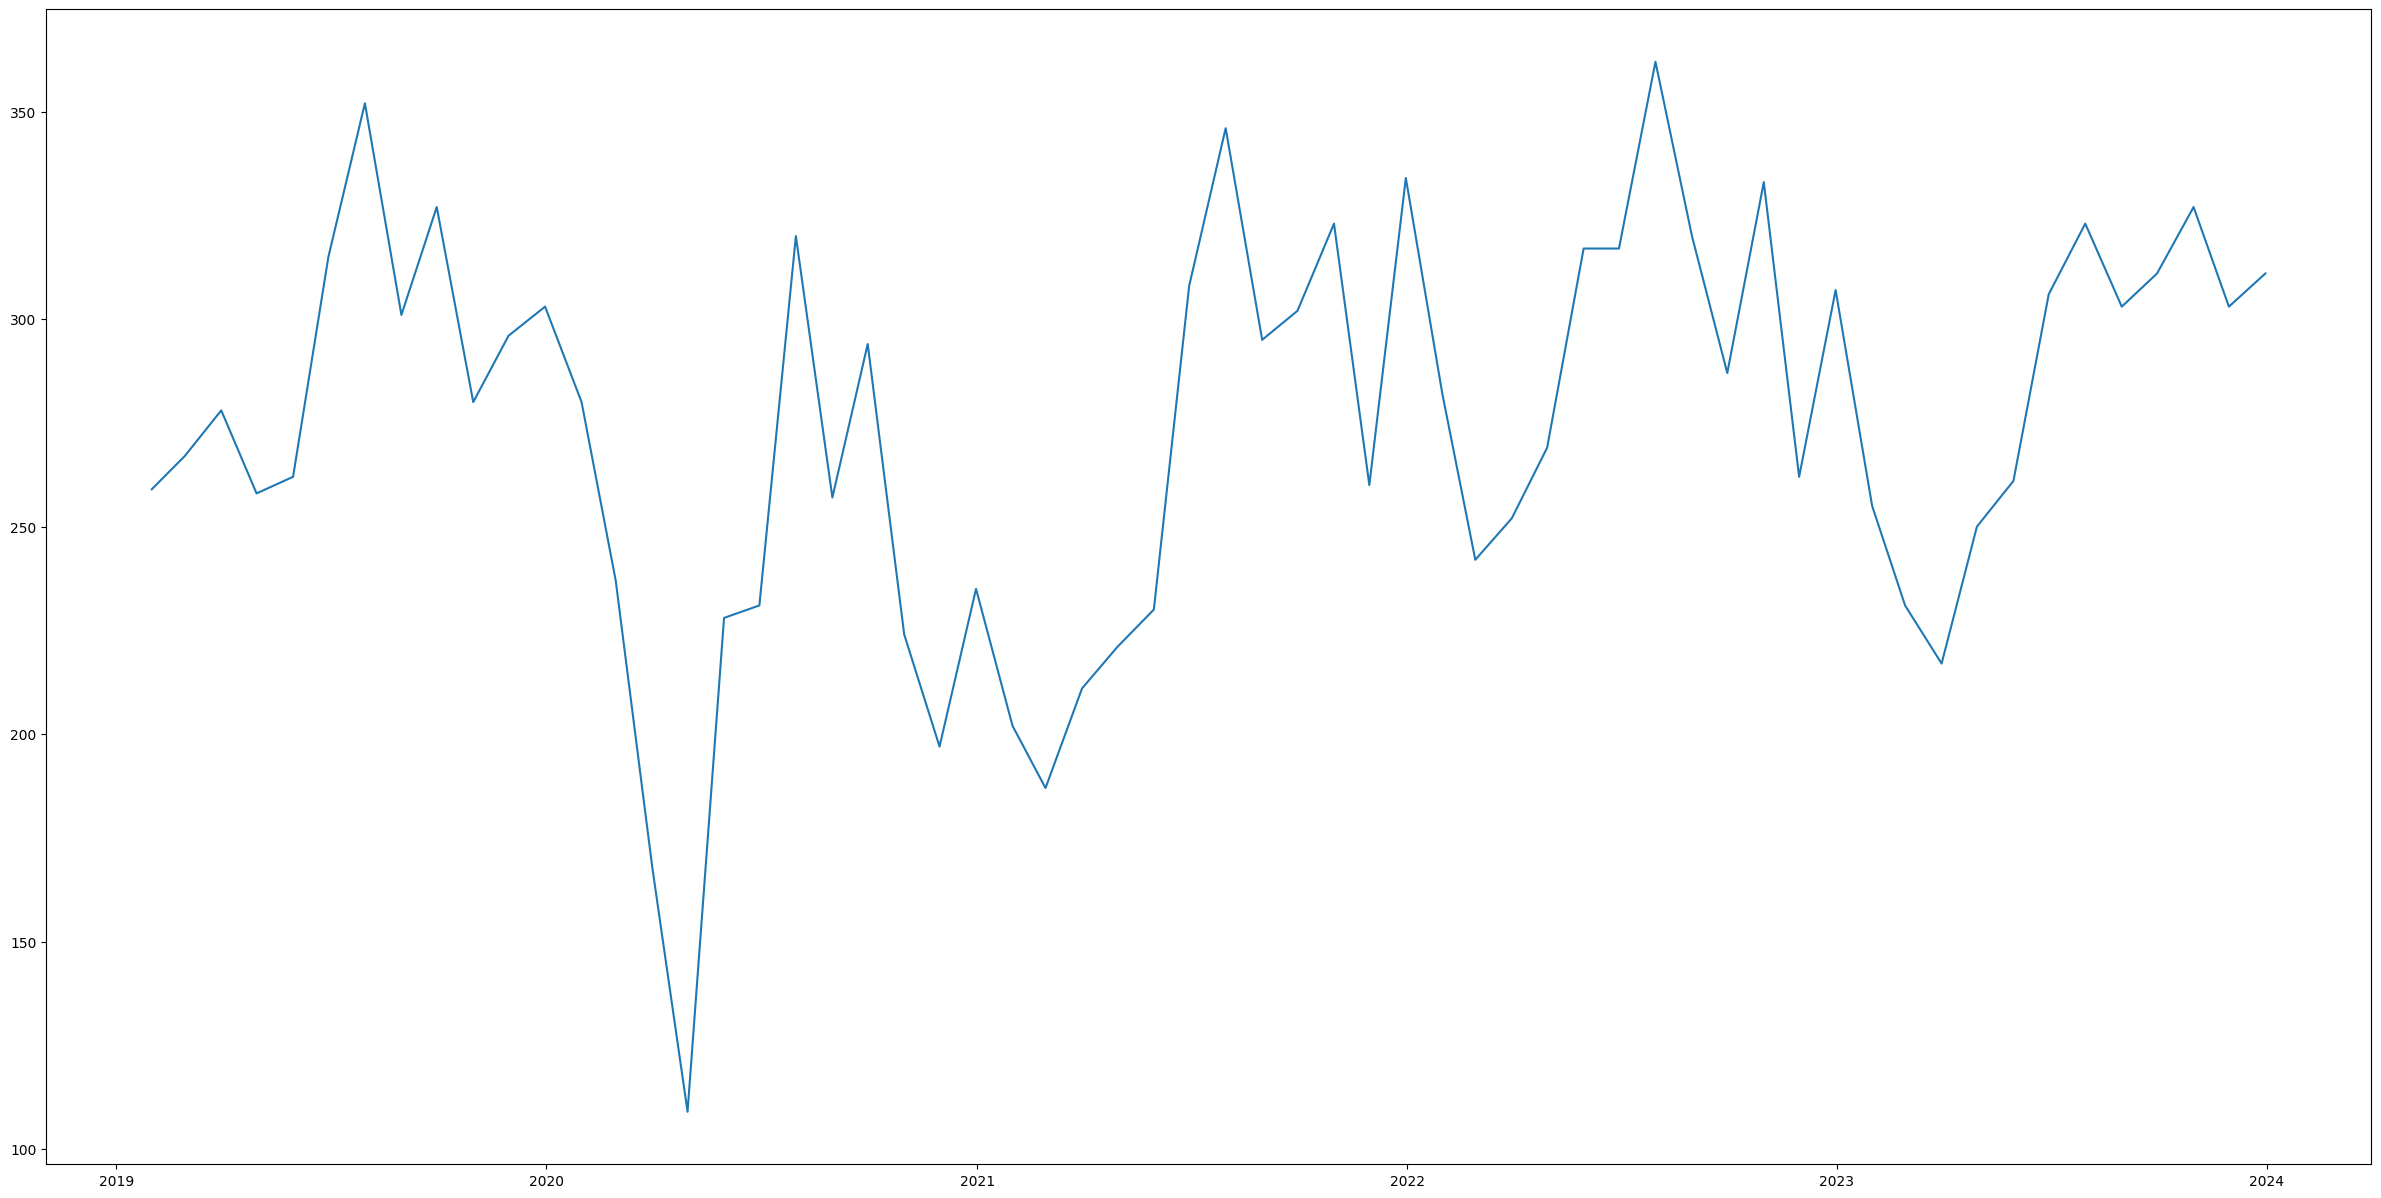

In [5]:
plt.figure(figsize = (30,15))
plt.plot('tué',data=df_temp_resampled)
plt.show()

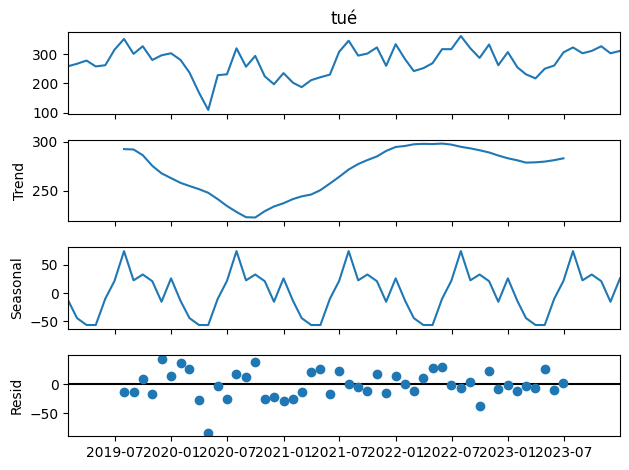

In [6]:
from statsmodels.tsa.seasonal import seasonal_decompose

variable_hospitalisé= seasonal_decompose(df_temp_resampled['tué'])
variable_hospitalisé.plot()
plt.show();

Etude approfondie des blessés hospitalisés en vue d'une prédiction

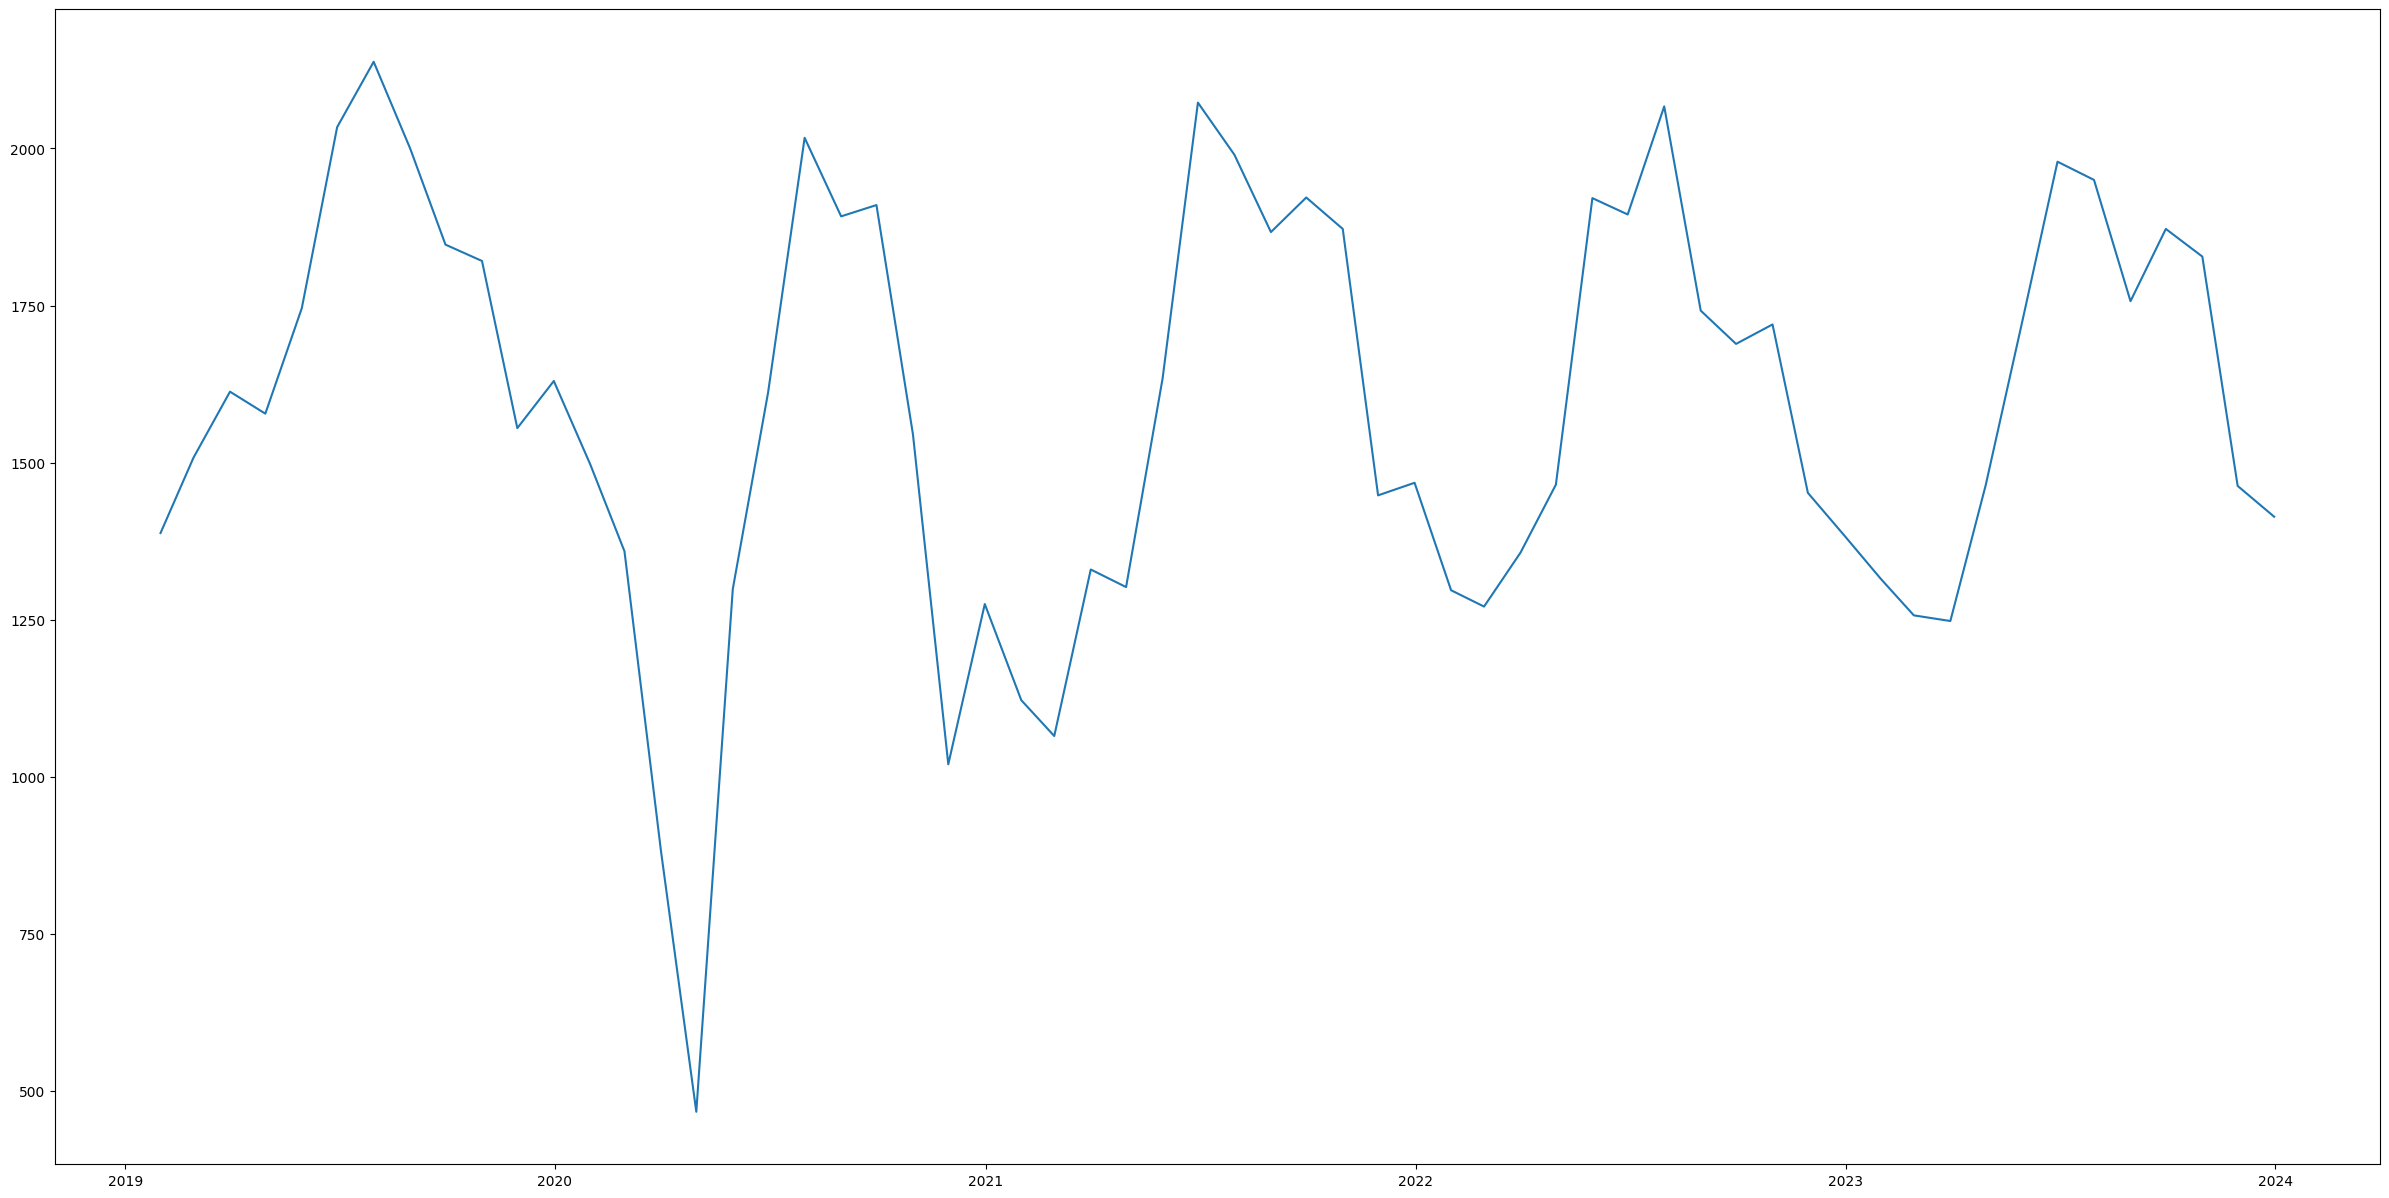

In [7]:
plt.figure(figsize = (30,15))
plt.plot('blessé_hospitalisé',data=df_temp_resampled)
plt.show()

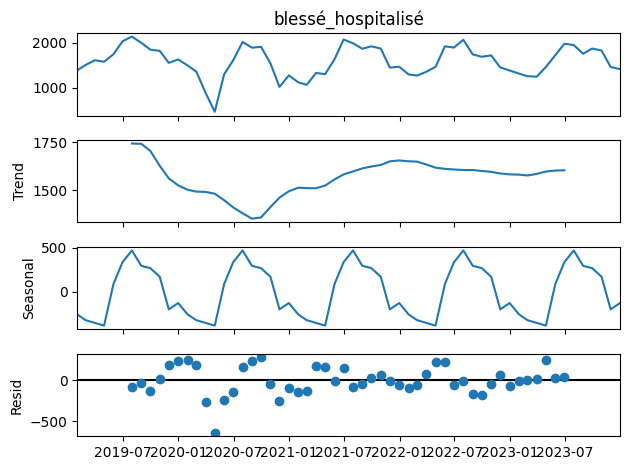

In [8]:
from statsmodels.tsa.seasonal import seasonal_decompose

variable_hospitalisé= seasonal_decompose(df_temp_resampled['blessé_hospitalisé'])
variable_hospitalisé.plot()
plt.show();

In [9]:
from sklearn.linear_model import LinearRegression
from sklearn.metrics import root_mean_squared_error
# hospitalisé
df_temp_resampled['blessé_hospitalisé_lag1'] = df_temp_resampled['blessé_hospitalisé'].shift(1)
df_temp_resampled.head()

#léger
df_temp_resampled['blessé_léger_lag1'] = df_temp_resampled['blessé_léger'].shift(1)
df_temp_resampled.head()
#tué
df_temp_resampled['tué_lag1'] = df_temp_resampled['tué'].shift(1)
df_temp_resampled.head()

,blessé_léger,blessé_hospitalisé,tué,blessé_hospitalisé_lag1,blessé_léger_lag1,tué_lag1
an_mois_jour,,,,,,
2019-01-31,3874,1388,259,NaN,NaN,NaN
2019-02-28,3741,1508,267,1388.0,3874.0,259.0
2019-03-31,4262,1613,278,1508.0,3741.0,267.0
2019-04-30,4196,1578,258,1613.0,4262.0,278.0
2019-05-31,4369,1746,262,1578.0,4196.0,258.0


In [10]:
#Création de variables explicatives à partir de la série temporelle (moyenne mobile sur les 3 derniers mois)

#Hospitalisé
df_temp_resampled['blessé_hospitalisé_MA_3months']= df_temp_resampled['blessé_hospitalisé'].rolling(window = 3).mean()
df_temp_resampled.head()

# Léger
df_temp_resampled['blessé_léger_MA_3months']= df_temp_resampled['blessé_léger'].rolling(window = 3).mean()
df_temp_resampled.head()
#Tué
df_temp_resampled['tué_MA_3months']= df_temp_resampled['tué'].rolling(window = 3).mean()
df_temp_resampled.head()

,blessé_léger,blessé_hospitalisé,tué,blessé_hospitalisé_lag1,blessé_léger_lag1,tué_lag1,blessé_hospitalisé_MA_3months,blessé_léger_MA_3months,tué_MA_3months
an_mois_jour,,,,,,,,,
2019-01-31,3874,1388,259,NaN,NaN,NaN,NaN,NaN,NaN
2019-02-28,3741,1508,267,1388.0,3874.0,259.0,NaN,NaN,NaN
2019-03-31,4262,1613,278,1508.0,3741.0,267.0,1503.000000,3959.000000,268.000000
2019-04-30,4196,1578,258,1613.0,4262.0,278.0,1566.333333,4066.333333,267.666667
2019-05-31,4369,1746,262,1578.0,4196.0,258.0,1645.666667,4275.666667,266.000000


In [11]:
# Suppression des Nans
df_temp_resampled= df_temp_resampled.dropna()
df_temp_resampled.head()

,blessé_léger,blessé_hospitalisé,tué,blessé_hospitalisé_lag1,blessé_léger_lag1,tué_lag1,blessé_hospitalisé_MA_3months,blessé_léger_MA_3months,tué_MA_3months
an_mois_jour,,,,,,,,,
2019-03-31,4262,1613,278,1508.0,3741.0,267.0,1503.000000,3959.000000,268.000000
2019-04-30,4196,1578,258,1613.0,4262.0,278.0,1566.333333,4066.333333,267.666667
2019-05-31,4369,1746,262,1578.0,4196.0,258.0,1645.666667,4275.666667,266.000000
2019-06-30,4911,2034,315,1746.0,4369.0,262.0,1786.000000,4492.000000,278.333333
2019-07-31,4961,2138,352,2034.0,4911.0,315.0,1972.666667,4747.000000,309.666667


In [12]:
# Normalisation des données

# Hospitalisé
y_hospitalisé = df_temp_resampled['blessé_hospitalisé']
X_hospitalisé = df_temp_resampled.drop('blessé_hospitalisé', axis = 1)

# Léger
y_léger = df_temp_resampled['blessé_léger']
X_léger = df_temp_resampled.drop('blessé_léger', axis = 1)

#Tué
y_tué = df_temp_resampled['tué']
X_tué = df_temp_resampled.drop('tué', axis = 1)

y_hospitalisé.head(56)

,blessé_hospitalisé
an_mois_jour,
2019-03-31,1613
2019-04-30,1578
2019-05-31,1746
2019-06-30,2034
2019-07-31,2138
2019-08-31,2000
2019-09-30,1847
2019-10-31,1821
2019-11-30,1555


rmse 77.1023212957387


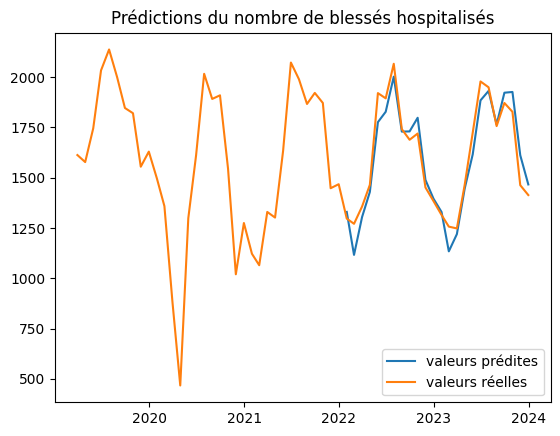

rmse 302.04390220801974


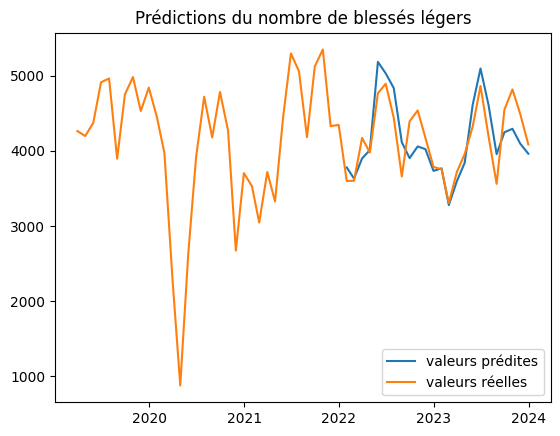

rmse 14.12619554113469


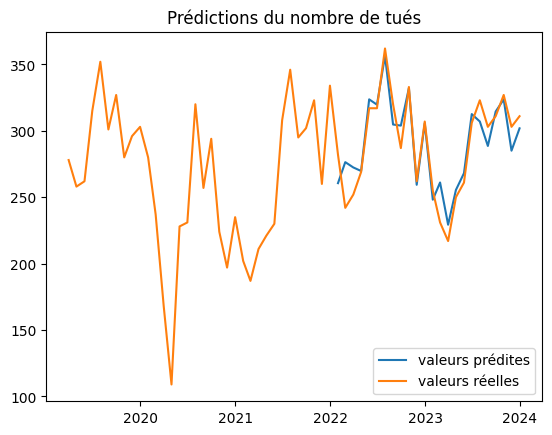

In [13]:
model= LinearRegression()

# Hospitalisé
X_hospitalisé_train = X_hospitalisé.iloc[: -24]
X_hospitalisé_test = X_hospitalisé.iloc[-24:]

y_hospitalisé_train = y_hospitalisé[:-24]
y_hospitalisé_test = y_hospitalisé.iloc[-24:]


model.fit(X_hospitalisé_train, y_hospitalisé_train)

pred_test_hospitalisé = model.predict(X_hospitalisé_test)

print ('rmse', root_mean_squared_error(pred_test_hospitalisé, y_hospitalisé_test))

plt.plot(y_hospitalisé_test.index, pred_test_hospitalisé, label = 'valeurs prédites')
plt.plot(y_hospitalisé.index, y_hospitalisé, label = 'valeurs réelles')
plt.title('Prédictions du nombre de blessés hospitalisés')
plt.legend()
plt.show();

#Léger
X_léger_train = X_léger.iloc[: -24]
X_léger_test = X_léger.iloc[-24:]

y_léger_train = y_léger[:-24]
y_léger_test = y_léger.iloc[-24:]


model.fit(X_léger_train, y_léger_train)

pred_test_léger = model.predict(X_léger_test)

print ('rmse', root_mean_squared_error(pred_test_léger , y_léger_test))

plt.plot(y_léger_test.index, pred_test_léger, label = 'valeurs prédites')
plt.plot(y_léger.index, y_léger, label = 'valeurs réelles')
plt.title('Prédictions du nombre de blessés légers')
plt.legend()
plt.show();

# Tué
X_tué_train = X_tué.iloc[: -24]
X_tué_test = X_tué.iloc[-24:]

y_tué_train = y_tué[:-24]
y_tué_test = y_tué.iloc[-24:]


model.fit(X_tué_train, y_tué_train)

pred_test_tué = model.predict(X_tué_test)

print ('rmse', root_mean_squared_error(pred_test_tué, y_tué_test))

plt.plot(y_tué_test.index, pred_test_tué, label = 'valeurs prédites')
plt.plot(y_tué.index, y_tué, label = 'valeurs réelles')
plt.title('Prédictions du nombre de tués')
plt.legend()
plt.show();

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

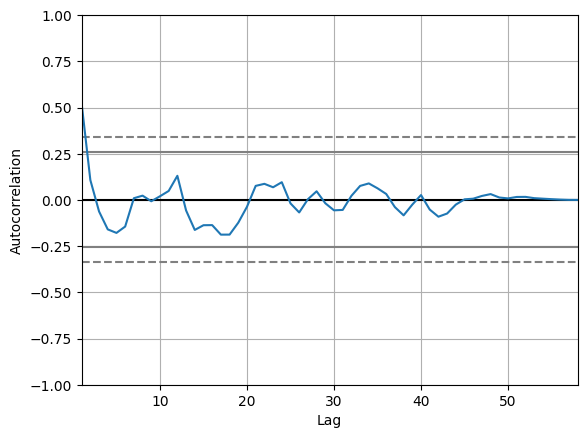

In [14]:

datalog = np.log(df_temp_resampled['blessé_léger'])
pd.plotting.autocorrelation_plot(datalog)

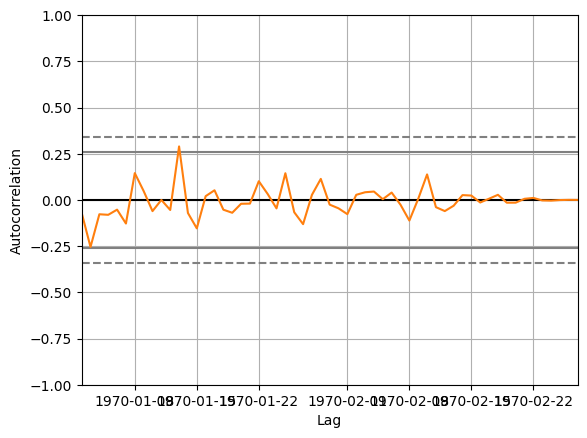

In [15]:
# Différenciation simple
datalog_1 = datalog.diff(1).dropna()
plt.plot(datalog_1)
pd.plotting.autocorrelation_plot(datalog_1);

<Axes: xlabel='Lag', ylabel='Autocorrelation'>

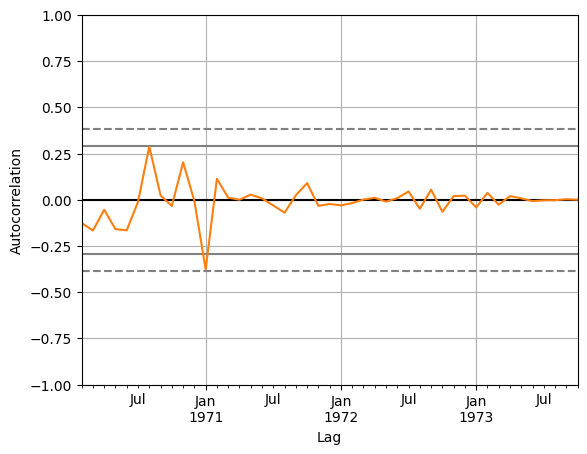

In [16]:
# Différenciation d'ordre 12
datalog_2 = datalog_1.diff(periods = 12).dropna()
datalog_2.plot()
pd.plotting.autocorrelation_plot(datalog_2)


In [17]:
import statsmodels.api as sm
print(sm.tsa.stattools.adfuller(datalog_2))

#Statistique ADF = -5.2036 < Valeurs critiques à 1%, 5%, et 10%
#P-valeur = 8,64 e-06 . Elle est inférieure à 0.05 → On rejette l’hypothèse nulle (H0).Cela signifie que la série n’a pas de racine unitaire, donc elle est stationnaire.

(-5.203598958964288, 8.644549412051289e-06, 4, 40, {'1%': -3.6055648906249997, '5%': -2.937069375, '10%': -2.606985625}, 9.255572431740895)


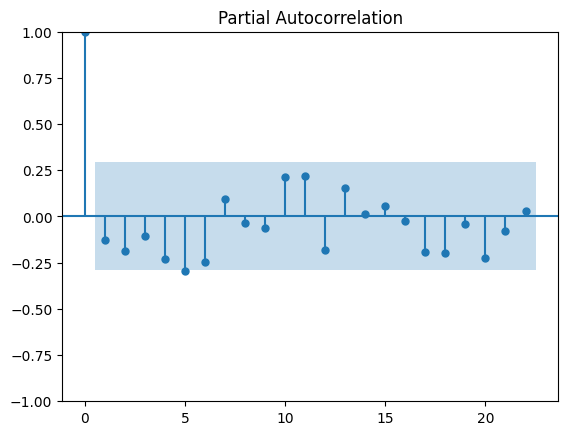

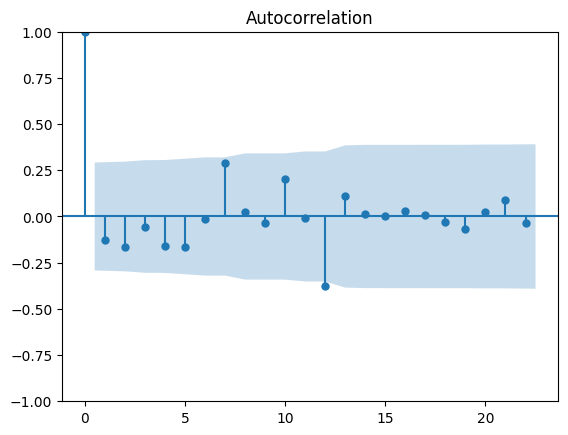

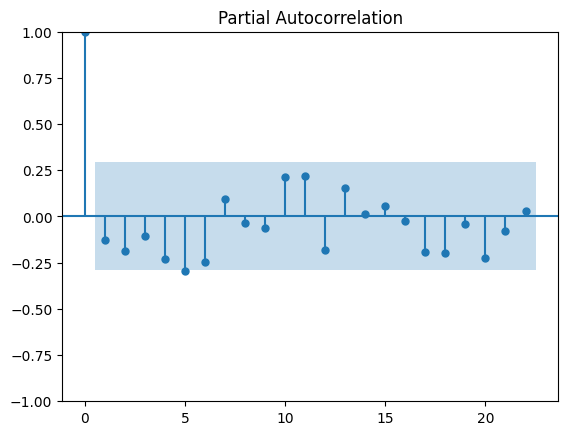

In [18]:
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf
plot_acf(datalog_2, lags = 22)
plot_pacf(datalog_2, lags = 22)

In [26]:
model = sm.tsa.SARIMAX(datalog, order = (1,1,1), seasonal_order = (0,1,1,12))
model_fitted = model.fit()
print(model_fitted.summary())

ValueError: Seasonal periodicity must be greater than 1.

In [23]:
model = sm.tsa.SARIMAX(datalog, order = (1,1,1), seasonal_order = (0,2,1,12))
model_fitted = model.fit()
print(model_fitted.summary())

/usr/local/lib/python3.11/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                       blessé_léger   No. Observations:                   58
Model:             SARIMAX(1, 1, 1)x(0, 2, 1, 12)   Log Likelihood                 -20.501
Date:                            Tue, 04 Feb 2025   AIC                             49.001
Time:                                    12:01:05   BIC                             54.987
Sample:                                03-31-2019   HQIC                            51.015
                                     - 12-31-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1          0.5088      0.340      1.498      0.134      -0.157       1.174
ma.L1         -0.8186      0.451   

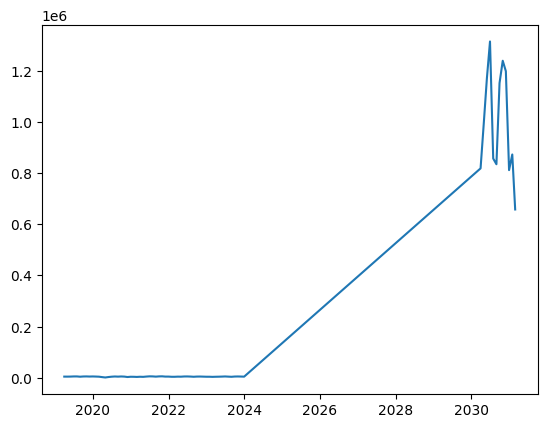

In [25]:
pred = np.exp(model_fitted.predict(132,143))
df_temp_resampled_léger_pred = pd.concat([df_temp_resampled['blessé_léger'], pred])


plt.plot(df_temp_resampled_léger_pred)

Faudrait il enlever l'année 2020 du covid? On pourrait faire ca par département, ce qui donne déjà une bonne base pour les secours.